In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from datetime import timedelta

In [2]:
# Binning funcs from Huayi

def binMinute(minute):
    '''
    Calculate which of the 15min bins the current minute falls in.
    The bins are 05, 20, 35, 50. 
    Current minutes less than 05 belong to bin 50 of the hour before. 
    '''    
    m2q= (minute-5)/15
    if m2q < 0:
        newminute = -10 
    elif m2q < 1:
        newminute = 5
    elif m2q < 2:
        newminute = 20
    elif m2q < 3:
        newminute = 35
    elif m2q < 4:
        newminute = 50
    return newminute       
    
def BinTime(df_datetime_col):
    '''
    Take a df column that contains datetime object (df_datetime_col)
    Return a new column that contains the binned datetime object
    The bins are as defined in binMinute
    '''
    binned_col= df_datetime_col.apply(lambda x: x.replace(minute = 0, second=0) + timedelta(minutes=binMinute(x.minute)))
    return binned_col

In [3]:
data_dir = './test_data/'

In [4]:
current_log = pd.read_csv(data_dir + 'current_log.csv', index_col=0)
forcast_log = pd.read_csv(data_dir + 'weather_log.csv', index_col=0)

In [5]:
times_lst = ['reception_time', 'reference_time', 'sunrise_time', 'sunset_time']

for col_n in times_lst:
    current_log[col_n] = pd.to_datetime(current_log[col_n], unit='s')

for col_n in times_lst:
    forcast_log[col_n] = pd.to_datetime(forcast_log[col_n], unit='s')

In [6]:
forcast_log.head(5)

,park_name,reception_time,reference_time,sunset_time,sunrise_time,clouds,rain,snow,wind_speed,wind_deg,humidity,press,press_sea,temp,temp_feels,temp_max,temp_min,status,detailed_status
0,Prospect Park,2020-04-03 15:31:35,2020-04-03 17:00:00,2020-04-03 19:22:20,2020-04-03 06:35:06,100,0.31,0,8.76,0,76,1006,1006,52.68,40.55,52.68,50.07,Rain,light rain
1,Prospect Park,2020-04-03 15:31:35,2020-04-03 20:00:00,2020-04-03 19:22:20,2020-04-03 06:35:06,100,0.18,0,8.29,6,77,1009,1009,51.94,40.32,51.94,49.98,Rain,light rain
2,Prospect Park,2020-04-03 15:31:35,2020-04-03 23:00:00,2020-04-03 19:22:20,2020-04-03 06:35:06,99,0.00,0,7.70,11,75,1011,1011,50.86,39.60,50.86,49.57,Clouds,overcast clouds
3,Prospect Park,2020-04-03 15:31:35,2020-04-04 02:00:00,2020-04-03 19:22:20,2020-04-03 06:35:06,94,0.00,0,6.33,14,76,1012,1012,49.15,39.34,49.15,48.51,Clouds,overcast clouds
4,Prospect Park,2020-04-03 15:31:35,2020-04-04 05:00:00,2020-04-03 19:22:20,2020-04-03 06:35:06,98,0.00,0,5.54,5,78,1013,1013,47.95,39.02,47.95,47.95,Clouds,overcast clouds


In [7]:
current_log.head(10)

,park_name,reception_time,reference_time,sunrise_time,sunset_time,clouds,rain_1h,snow_1h,wind_speed,wind_deg,humidity,press,temp,temp_feels,temp_max,temp_min,status,detailed_status
0,Prospect Park,2020-04-04 08:38:33,2020-04-04 08:38:33,2020-04-04 10:33:33,2020-04-04 23:23:28,90,0.25,0,5.1,40,93,1016,46.40,38.70,48.20,44.6,Rain,light rain
1,Prospect Park,2020-04-04 09:00:05,2020-04-04 09:00:04,2020-04-04 10:33:33,2020-04-04 23:23:28,90,0.25,0,4.6,40,93,1016,46.60,39.56,48.20,44.6,Rain,light rain
2,Prospect Park,2020-04-04 09:10:03,2020-04-04 09:10:02,2020-04-04 10:33:33,2020-04-04 23:23:28,90,0.00,0,4.6,40,93,1016,46.69,39.67,48.20,44.6,Rain,light rain
3,Prospect Park,2020-04-04 09:20:03,2020-04-04 09:20:02,2020-04-04 10:33:33,2020-04-04 23:23:28,90,0.00,0,4.6,40,93,1016,46.85,39.87,48.20,45.0,Rain,light rain
4,Prospect Park,2020-04-04 09:30:03,2020-04-04 09:30:02,2020-04-04 10:33:33,2020-04-04 23:23:28,90,0.00,0,4.1,50,93,1016,47.05,40.75,48.99,45.0,Rain,light rain
5,Prospect Park,2020-04-04 09:40:03,2020-04-04 09:30:02,2020-04-04 10:33:33,2020-04-04 23:23:28,90,0.00,0,4.1,50,93,1016,47.05,40.75,48.99,45.0,Rain,light rain
6,Prospect Park,2020-04-04 09:50:02,2020-04-04 09:46:58,2020-04-04 10:33:33,2020-04-04 23:23:28,90,0.00,0,4.1,50,93,1016,47.43,41.22,48.99,46.0,Rain,light rain
7,Prospect Park,2020-04-04 10:00:03,2020-04-04 10:00:02,2020-04-04 10:33:33,2020-04-04 23:23:28,90,0.00,0,4.1,50,93,1016,47.73,41.59,50.00,46.0,Rain,light rain
8,Prospect Park,2020-04-04 10:10:02,2020-04-04 10:00:02,2020-04-04 10:33:33,2020-04-04 23:23:28,90,0.00,0,4.1,50,93,1016,47.73,41.59,50.00,46.0,Rain,light rain
9,Prospect Park,2020-04-04 10:20:03,2020-04-04 10:20:02,2020-04-04 10:33:33,2020-04-04 23:23:28,90,0.00,0,4.1,50,93,1016,48.20,42.17,50.00,46.0,Rain,light rain


In [8]:
current_log['time_bin'] = BinTime(current_log['reception_time'])

binned_current_log = pd.concat(
    [current_log.groupby(['time_bin']).mean(),
     current_log.groupby(['time_bin']).max()[['park_name', 'sunrise_time', 'sunset_time', 'status', 'detailed_status']]],
    axis=1, sort=False)

binned_current_log.to_csv(data_dir + 'binned_current_log.csv')

## Current conditions log
---
Current weather in the park was recorded every 10 minutes.

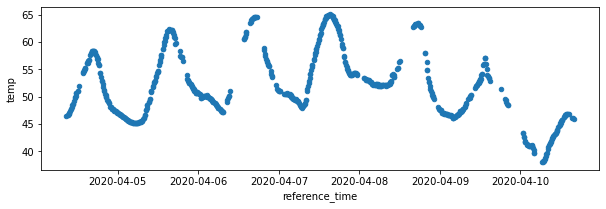

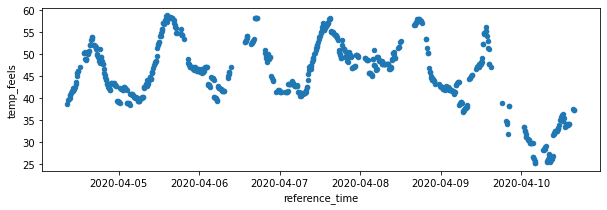

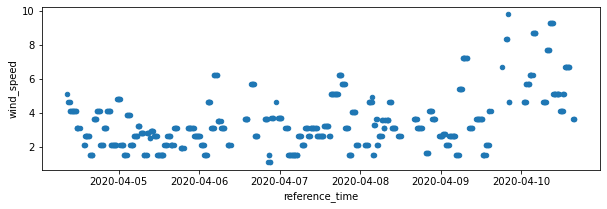

In [16]:
current_log.plot.scatter(x='reference_time', y='temp', figsize=(10,3))
current_log.plot.scatter(x='reference_time', y='temp_feels', figsize=(10,3))
current_log.plot.scatter(x='reference_time', y='wind_speed', figsize=(10,3))

## Forcast log
---
5 day / 3 hour forecast data

In [10]:
forcast_times_today = [pd.Timestamp('02:00:00'), pd.Timestamp('05:00:00'),
                       pd.Timestamp('08:00:00'), pd.Timestamp('11:00:00'),
                       pd.Timestamp('14:00:00'), pd.Timestamp('17:00:00'),
                       pd.Timestamp('20:00:00'), pd.Timestamp('23:00:00')]

In [11]:
time_now = pd.Timestamp.now()

In [12]:
# get time of next forcast
time_diff = [x - time_now for x in forcast_times_today]

min_diff = min(x for x in time_diff if x > pd.Timedelta('0 days 00:00:00'))

next_forcast = forcast_times_today[time_diff.index(min_diff)]

In [13]:
filter1 = forcast_log['reference_time'] == next_forcast

In [14]:
# Most recent prediction
print('Current date & time: {}'.format(time_now))
forcast_log.where(filter1).dropna().iloc[[-1]]

Current date & time: 2020-04-10 16:11:38.699536


,park_name,reception_time,reference_time,sunset_time,sunrise_time,clouds,rain,snow,wind_speed,wind_deg,humidity,press,press_sea,temp,temp_feels,temp_max,temp_min,status,detailed_status
2200,Prospect Park,2020-04-10 14:00:05,2020-04-10 17:00:00,2020-04-10 19:29:36,2020-04-10 06:23:52,100.0,0.0,0.0,11.81,299.0,52.0,997.0,997.0,46.99,28.29,47.44,46.99,Clouds,overcast clouds
